## Hybrid Crytograph Project – Group 3

Names and students numbers: Bo Cresser (2547206), Matthew Pygott (2568691), Zhiyao Wang(2509441) ________________________

In this project, we will design a hybrid cryptography system using the RSA protocol for key exchange and the Vigenère cipher for bulk data transfer. We will then improve the security of your system by adding an extra layer of random encoding. Lastly, we will complete one of the extensions, from either section 5 (breaking the Vigenère cipher), section 6 (cracking the RSA protocol), or section 7 (implementing RSA+AES and DH+AES).

### Setup: Collaborating coding infrastructure

We spent most of the first two weeks of the project working out how to code collaboratively. Charles disuaded us from trying to use Notable or emailing each other sections of code like some Frankensein's monster.

So, we attempted to use GitHub.

Matt, who is most experience with coding, having done Computer Science A Level, set up a GitHub repository for us. We then tried to set up Visual Studio Code, which we new could be integrated with GitHub to make it easier to pull and push changes.

However, this created it's own issues, as the whole team had to install and get used to VSCode, which is powerful but confusing to start with. Sam, one of the helpers in one of the tutorials was very helpful.

But, the technical difficulties kept coming.

From installing Python natively to cloning directly onto our computers, we overcame waves upon waves of novel challenges. In the end, we decided not to use branches as this added another layer of complication. Some members of the team also dragged and dropped their changes manually to and from GitHub as they could not get this feature within VSCode to work.

While there may have been a more effective method for our level of expertise (or lack of), once we worked out how to use GitHub, it did have the benefit of backing up everything we committ so that we could go back if anything was accidentally overwritten or deleted. It was also a very good was to learn how to use GitHub, in case any of us do more formal collaborative coding in future.

Now, onto the project...

### Setup: Global variables and reusable functions
Early on in the project we realised that planning ahead and making functions reusable would be essential to a successful project as it is more efficient, can reduce time spent coding similar functions that we have already made and also it can create a more robust solution as the functions we use are well tested.

To start we defined some of the global variables and necessary libraries that we will use throughout the project.

In [3]:
import os

parent_folder = '/Users/paddysherlock/MattPygottCode'

print(f"📂 listing contents of: {parent_folder}")
print("--------------------------------------------------")

try:
    for name in os.listdir(parent_folder):
        # We only want to see folders, not hidden files
        if not name.startswith('.'):
            print(f"'{name}'")
except FileNotFoundError:
    print("❌ Critical: Even the 'MattPygottCode' folder wasn't found.")

📂 listing contents of: /Users/paddysherlock/MattPygottCode
--------------------------------------------------
❌ Critical: Even the 'MattPygottCode' folder wasn't found.


In [2]:
#Libraries
import requests, os, sys, random, time, statistics, matplotlib.pyplot as plt, numpy as np
sys.path.append('/Users/paddysherlock/Library/Python/3.9/lib/python/site-packages/jedi/inference/compiled/subprocess')
from functions import *

In [2]:
#Global variables
global alphabet_upper
alphabet_upper="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
global alphabet_lower
alphabet_lower=alphabet_upper.lower()

As we are working with alphabetical messages and sometime keys in this project we decided to write a function clean_text(). The purpose of this is to only keep alphabetical characters from the inputted text. It has parameters of the text, preserve_case and verbose. preserve_case is a parameter that if False converts the message to upper case, this makes it reusable for more questions later on.

In [3]:
#input cleaning function

def clean_text(g_in_text,preserve_case=True,verbose=False):
    in_text=g_in_text#make a local copy
    out_text=""
    if verbose:
        print("Input text is: ", in_text)
    for i in range (0,len(in_text)): #run through all characters and add them if they are in the alphabet
        if in_text[i] in alphabet_lower:
            out_text+=in_text[i]
        elif in_text[i] in alphabet_upper:
            out_text+=in_text[i]
    if verbose:
        print("Text without spaces, symbols, numbers ",out_text)
    if not(preserve_case): #if we aren't preserving the case then we convert it all to upper case
        out_text=str(out_text.upper())
        if verbose:
            print("Case not preserved so convert it to uppercase ",out_text)
    return out_text

It works by iterating through each character in in_text and adding concatenating it to out_text if its in the alphabet. You can try it below.

In [4]:
message="James walked his dog Jeremery!"
print("The cleaned version of that message is: ",clean_text(message,True))

The cleaned version of that message is:  JameswalkedhisdogJeremery


#### Core section 1: Implementing functions to encrypt and decrypt messages using the Caesar cipher and the Vigenère cipher. 

First we wrote the function caesar_cipher(). This is one function to both encrypt and  decrypt messages depending on the argument passed in by the user, this  is to improve space  effiency and increase robustness. Its parameters are g_input_text where g stands for given, g_key,encrypt and verbose.

In [5]:
def caesar_cipher(g_input_text,g_key,encrypt=True,verbose=False):

    #input_text should be fed in as a string, key should be any integer although it only is unique from 0,26

    input_text=g_input_text #creating local copies of arguments
    
    output_text=""
    if encrypt:
        key_multiplier=1
    else:
        key_multiplier=-1
    key=g_key*key_multiplier # g for given

    input_text=clean_text(input_text) #clean the input

    for i in range (0,len(input_text)):
        if input_text[i] in alphabet_upper:
            position_in_alphabet=alphabet_upper.index(input_text[i])
            output_text+=alphabet_upper[(position_in_alphabet+key)%26]
        else: #if adding support for spaces later add it below and change the clean_text function to suppport this
            position_in_alphabet=alphabet_lower.index(input_text[i])
            output_text+=alphabet_lower[(position_in_alphabet+key)%26]
    return output_text

It works in a few simple steps:
1. Make copies of input text and key to make sure they are taken as copies.
2. If the user has specified to encrypt the message then our key is  multiplied by one, otherwise it is multiplied by -1 which means when the shift is applied it is in the opposite direction effectively decrypting the message.
3. We  iterate through the input message and for each character we select the appropriate case of alphabet and we add the key to its numerical position in the alphabet. We take the mod of this to make sure it lies betweeen 0 and 26 then we add the character at that position to the output.
4. We output the output_text

See examples below on how it works on different messages and with the null shift.

In [6]:
#first we see how it works for a normal key
print(message, "encrypted with key=5 is: ")
print(caesar_cipher(message,5))

#show that the decrypting works
print("\nWe can decrypt this by using the same key: ")
print(caesar_cipher(caesar_cipher(message,5), 5,False))

#Show that it works for the null shift
print("\nThe caesar cipher function also works for the null shift (key=0), this outputs the same message as inputted \nalbeit cleaned by the clean text function:")
print(caesar_cipher(message,0))

#Show that it works for random key
r_key=random.randrange(0,26)
print("\nThe function also works for a random key e.g.",r_key, "which gives the encrypted message:")
print(caesar_cipher(message,r_key))
print("Decrypting it works still:")
print(caesar_cipher(caesar_cipher(message,r_key),r_key,False))

#We can read data from a text file and encrypt it then write it to another text file
treasure_island_text=open("text_files/message_treasure_island.txt","r")
cipher_text=open("text_files/cipher_text.txt","w")
print("\nWe can read from a file, encrypt it and write it to a file.")
line=treasure_island_text.readline()
while line!="":
    cipher_text.write(caesar_cipher(line,r_key)+"\n")
    line=treasure_island_text.readline()
treasure_island_text.close()
cipher_text.close()

James walked his dog Jeremery! encrypted with key=5 is: 
OfrjxbfqpjimnxitlOjwjrjwd

We can decrypt this by using the same key: 
JameswalkedhisdogJeremery

The caesar cipher function also works for the null shift (key=0), this outputs the same message as inputted 
albeit cleaned by the clean text function:
JameswalkedhisdogJeremery

The function also works for a random key e.g. 3 which gives the encrypted message:
MdphvzdonhgklvgrjMhuhphub
Decrypting it works still:
JameswalkedhisdogJeremery


FileNotFoundError: [Errno 2] No such file or directory: 'text_files/message_treasure_island.txt'

Next was Vigenere cipher. We named the function v_cipher() as it is clearly distinguishable from caesar_cipher() and hard to misspell. Once again this is only one function to both encrypt and decrypt. It uses caesar cipher to shift each character in the message by an amount given in the key. 

This is our first demonstration of reusable functions. It is more space efficient and more robust as if we modify the functionality of the reusable function it changes for every part of the code it is used, otherwise we would have to change many parts which can cause errors. 

The inputs are g_input_text which is given input text passed in as a string, g_key which is given key also passed in as a string of any length, encrypt which is a boolean to decide if the function is encrypting or decrypting, verbose which is a boolean used for error checking.

In [ ]:
#vigenere cipher

def v_cipher(g_input_text,g_key,encrypt=True,verbose=False):
    input_text=clean_text(g_input_text)
    key=clean_text(g_key,preserve_case=False)
    output_text=""

    #for each letter in inpur text message we perform a caesar cipher on it using the ith char in key
    for i in range (0,len(input_text)):
        ith_key=alphabet_upper.index(key[i%len(key)])
        if verbose:
            print("Ith key is", ith_key)
        output_text+=caesar_cipher(input_text[i],ith_key,encrypt)
    return output_text

This function works in a few simple steps. 
1. We make copies of the input text and key and clean them both. Cleaning the key is really helpful here as it means the function can consistently decrypt texts even if someone drops a case in one letter of the key. Note we capitalise the key in the clean_text function by setting preserve_case=False.
2. We iterate through each character in the input text. For each character we cipher it using the part of the key in the corresponding place. Each character in the key is equivalent to an integer that we can encrypt with (with A being the null shift 0). If the message is longer than the key then we start from the beginning of the key again hence the modulus in the line defining ith_key.
3. Using the ith_key we encrypt each character in input_text and concatenate it onto output_text
4. We return output_text

Below are some tests to show the functionality and robustness of this function.

In [ ]:
#First show basic functionality of the function
print("Encrypting our standard message with key='HANDS' we get: ")
print(v_cipher(message,"HANDS"))
print("Decrypting this with the same key gets us: ")
print(v_cipher(v_cipher(message,"HANDS"),"HANDS",False))

#Testing varied key inputs
print("\nWe can see that the key 'AAA' is the null cipher, which gives, as expected:")
print(v_cipher(message,"AAA"))
print("Of course, using the same key to 'decrypt' we get:")
print(v_cipher(v_cipher(message,"AAA"),"AAA",False))

print("\nWe can also introduce different cases and symbols to our key and see it still works, for example:")
print("The key 'Ha2Nd s' gives:")
print(v_cipher(message,"Ha2Nd s"))
print("Using the same key to decrypt we get:")
print(v_cipher(v_cipher(message,"Ha2Nd s"),"Ha2Nd s",False))

print("\nMorevoer, we can also encypt with a key longer than the message for example:")
print("The key 'Harry went for a walk with his cat Harriot and stopped at the park' gives:")
print(v_cipher(message,"Harry went for a walk with his cat Harriot and stopped at the park"))
print("Using the same key to decrypt we get:")
print(v_cipher(v_cipher(message,"Harry went for a walk with his cat Harriot and stopped at the park"),"Harry went for a walk with his cat Harriot and stopped at the park",False))

#We can also encrypt and decrypt using a random key
r_v_key=""
for i in range(0,random.randrange(1,50)):
    r_v_key+=str(alphabet_upper[random.randrange(0,26)])
print("\nLastly, we can use a key of random letters and length, for example:")
print("The key", r_v_key, "gives:")
print(v_cipher(message,r_v_key))
print("Using the same key to decrypt we get:")
print(v_cipher(v_cipher(message,r_v_key),r_v_key,False))

Encrypting our standard message with key='HANDS' we get: 
QazhkdaynwkhvvvvgWhjlmruq
Decrypting this with the same key gets us: 
JameswalkedhisdogJeremery

We can see that the key 'AAA' is the null cipher, which gives, as expected:
JameswalkedhisdogJeremery
Of course, using the same key to 'decrypt' we get:
JameswalkedhisdogJeremery

We can also introduce different cases and symbols to our key and see it still works, for example:
The key 'Ha2Nd s' gives:
QazhkdaynwkhvvvvgWhjlmruq
Using the same key to decrypt we get:
JameswalkedhisdogJeremery

Morevoer, we can also encypt with a key longer than the message for example:
The key 'Harry went for a walk with his cat Harriot and stopped at the park' gives:
QadvqseydjryiodzqFmkltmja
Using the same key to decrypt we get:
JameswalkedhisdogJeremery

Lastly, we can use a key of random letters and length, for example:
The key NKHERE gives:
WktijanvriulvcksxNrblqvvl
Using the same key to decrypt we get:
JameswalkedhisdogJeremery


#### Core section 2: Implementing a function to systematically break the Caesar cipher using letter frequency analysis.

To write this function, we started by importing texts to approximate the frequency of letters in the English language.

In [ ]:


def url_to_text_utf8(url):
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url)
    response.encoding = 'utf-8-sig'
    return response.text

austen_text = url_to_text_utf8("https://www.gutenberg.org/files/1342/1342-0.txt")

# print(austen_text[:1000])

austen_text[:1000]

def text_to_file(text_string, file_name):
    '''
    Write the string text_string, to file with 
    name file_name (and return the object None). 
    '''
    with open(file_name,'w', encoding='utf-8-sig', errors='ignore') as f:
        f.write(text_string)
    return None

text_to_file(austen_text,"text_files/jane_austen.txt")

def file_to_text(file_name):
    '''
    Read the text file with name file_name
    and return its contents as a string.
    '''
    with open(file_name,'r',encoding='utf-8-sig', errors='ignore') as f:
        text = f.read()
    return text

new_austen_text = file_to_text("text_files/jane_austen.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'text_files/jane_austen.txt'

#### Core section 3: Writing functions that implement the Hybrid System described below:

"Hybrid System. Alice generates her private and public key. Bob generates a Vigenère key and Vigenère encrypts/enciphers his message with this key. Then, after slicing it into parts (if necessary) he encodes and RSA encrypts his Vigenère key using Alice’s public key
and finally sends both the resulting tuple of ciphertext integers and his Vigenère encrypted message to Alice. Alice uses her private key to RSA decrypt the tuple of ciphertext integers. She then converts/decodes the resulting integers to strings and so reconstructs the Vigenère key. She uses this to Vigenère decrypt/decipher Bob’s message."

To write these functions, we started by...

In [ ]:
print('This is a python block')

This is a python block


#### Core section 4: Redesigning our system by performing a random encoding of each letter of the alphabet in to one or more 2-grams.

There are 26 ·25 = 650 2-grams made up of distinct letters. The goal is to encode the alphabet by 2-grams in such a way that the frequency of occurrence of each letter is disguised. We add this type of encode system before applying the Vigenère cipher and decode it after the Vigenère cipher.

To implement this encoding, we first generate all 26 * 25 = 650 possible bigrams composed of two distinct uppercase letters.

In [ ]:
import random
import string

#generate bigrams 
def generate_bigrams():
    letters = string
    letters = "ABCDEFGHIJKLNMOPQRSTUVWXYZ"  #all letters
    all_bigrams = []   
    for a in letters:
        for b in letters:
            if a != b:                      #different letters
                all_bigrams.append(a+b)
    return all_bigrams

These bigrams are randomly shuffled and then be assigned to letters according to statistics on the frequency of English letters.

In [ ]:
#this is a function which works to assign bigrams to each letter
def bigrams_mapping(total_bigrams = 400):
    #the frequency of English letters provided by google
    letter_frequency = {
        'E': 0.127, 'T': 0.091, 'A': 0.0812, 'O': 0.0768, 
        'I': 0.0757,'N': 0.0723, 'S': 0.0651, 'R': 0.0628, 'H': 0.0505, 
        'L': 0.0407, 'D': 0.0382, 'C': 0.0334, 'U': 0.0273, 'M': 0.0251, 
        'W': 0.0168, 'F': 0.024, 'G': 0.0187, 'Y': 0.0166, 'P': 0.0214, 
        'B': 0.0148, 'V': 0.0105, 'K': 0.0054, 'X': 0.0023,'J': 0.0016,
        'Q': 0.0012, 'Z': 0.0009
    }
    letters = "ABCDEFGHIJKLNMOPQRSTUVWXYZ"
    all_bigrams = generate_bigrams()
    #shuffle bigrams randomly
    random.shuffle(all_bigrams)

    #assign bigrams according to their frequency
    #sizes is the amount of bigram that each letter will be assigned
    sizes = {}
    for ch in letters:
        sizes[ch] = letter_frequency[ch] * total_bigrams

    bigrams_per_letter = {}
    for ch in letters:
        #transfer the value into integer
        num = round(sizes[ch])
        #ensure every letter receives at least one bigram
        if num < 1:
            num = 1
        bigrams_per_letter[ch] = num

    #here we do the seperation
    map_bigrams = {}
    index = 0
    for ch in letters:
        k = bigrams_per_letter[ch]
        #slicing the shuffled bigrams list
        map_bigrams[ch] = all_bigrams[index : index + k]
        #move the index forward so the next letter will get a new part
        index += k
    return map_bigrams

The following function shows the encoding part. Function "message_encode" replaces each plaintext letter with a randomly chosen bigram

In [ ]:
def message_encode(message, map_bigrams):
    #Transfer all plaintext into uppercase letters
    message = message.upper()
    #remove the spaces
    message = message.replace(" ", "")
    encoded = ""

    for ch in message:
        if ch in map_bigrams:
            #get the list of bigrams assigned to this letter
            bigram_list = map_bigrams[ch]
            #randomly choose one bigram from the list
            chosen_bigram = random.choice(bigram_list)
            #add the chosen bigram to the encoded text
            encoded = encoded + chosen_bigram
        else:
            print("Error")
            return None
        
    return encoded

To recover the plaintext from the ciphertext, there are two steps to do. First we find the rule of mapping each bigram back to the letter according to the mapping table provided during the encryption. Second, we cut the ciphertext into two characters each time, and each pair of characters forms one bigram.
Finally we use the dictionary to change the bigrams to the original text.

In [ ]:
def inverse_mapping(map_bigrams):
    #empty dictionary to store the inversed mapping 
    inverse = {}
    for letter in map_bigrams:
        bigrams_list = map_bigrams[letter]

        for code in bigrams_list:
            #inverse the mapping
            inverse[code] = letter

    return inverse

#decode part
def bigrams_decode(encoded, map_bigrams):
    inverse = inverse_mapping(map_bigrams)

    #check whether the length of ciphertext is divisible by 2
    #if not, it should be invalid
    if len(encoded) % 2 != 0:
        print("error")
        return None
    
    #empty string to store the final decoded plaintext
    decoded_text = ""
    for i in range(0, len(encoded), 2):
        #loop through the ciphertext 2 characters at a time
        bg = encoded[i: i + 2]
        decoded_text += inverse[bg]

    return decoded_text

Below is a test that shows this program works.

In [ ]:
#test
mapping = bigrams_mapping(400)
messages = [
    "HELLO",
    "THIS IS A TEST",
]
for msg in messages:
    print("The plaintext is :")
    print(msg)

    encoded_bigram = message_encode(msg, mapping)
    print("Bigrams encoded ciphertext:")
    print(encoded_bigram)

    decoded_text = bigrams_decode(encoded_bigram, mapping)
    print("Decoded text:")
    print(decoded_text)

    no_space_msg = msg.replace(" ", "")
    no_space_msg = no_space_msg.upper()
    
    if decoded_text == no_space_msg:
        print("Pass, the decoded text matches the original text")
    else:
        print("Fail, the decoded text does not match the orginal text")



The plaintext is :
HELLO
Bigrams encoded ciphertext:
SFMJJFXWCM
Decoded text:
HELLO
Pass, the decoded text matches the original text
The plaintext is :
THIS IS A TEST
Bigrams encoded ciphertext:
TOOKEDNVHCZLDTIQHSLIPY
Decoded text:
THISISATEST
Pass, the decoded text matches the original text


Compared to the system in question 3, the hybrid system in question 4 provided a stronger security guarantees. 
In question 3, the security of the hybrid system relies almost entirely on RSA. Once if the key length of the Vigenère cipher is estimated (like Kasiski style analysis mentioned in question 5 below), the key can be recovered by frequency analysis.
In question 4 however, the random bigram encoding makes an effort to hide the real letter frequencies and makes inferring both key length and frequency harder.
Therefore, the encode system in question 4 is strictly more secure than that in question 3.

#### Extension: Section 6: Cracking the RSA protocol

We decided to tackle question 6 as this quesion links to number theory and the RSA protocal, which we had found interesting in the week 8 tutorial and 4th homework.

The aim of this question is to compare methods of finding the smallest factor of large primes. The idea is that if the RSA protocol was incorrectly implemented and p and q were too small, we would be able to factorise N with these methods.

Firstly, we will check whether the smallest_factor_function is working correctly. To do this, we generate primes p and q,  input N = p · q to the smallest factor function, and inspect whether the output is itself p or q.

In [ ]:
# Write function to test whether the factor function works as intended
def test_factor_function(input_function):
    p = random_prime(16)
    q = random_prime(16)
    N = p * q
    factor = input_function(N)
    print("p =", p)
    print("q =", q)
    print("N =", N)
    print("Found factor:", factor)
    if factor == p or factor == q:
        print("Found factor is correct.")
    
# Test whether the function works as intended for random p and q
print("Testing smallest factor algorithm with random N for 16 bit p and q:")
test_factor_function(smallest_factor)

Testing smallest factor algorithm with random N for 16 bit p and q:
p = 57047
q = 40093
N = 2287185371
Found factor: 40093
Found factor is correct.



The function seems to be working! Now, starting with l = 16 bit primes, we wrote an algorithm that shows the average computation time on input N = p · q for k-bit primes p, q for k = l, l + 1, l + 2, . . . . 

We have used 3 iterations for each bit length to get an average. We decided to just test computation times up to 1 second at this stage, and then test up to 15 minutes once we know the procedures are working.

In [ ]:
# Define function to time factorisation function
def time_factorisation(l, max_time, iterations, input_function, Verbose=False):
    bit_lengths = []
    avg_times = []
    
    while True:
        times = []
        for _ in range(iterations):  # Run 3 trials for each bit length
            p = random_prime(l)
            q = random_prime(l)
            N = p * q
            start_time = time.time()
            input_function(N)
            end_time = time.time()
            times.append(end_time - start_time)

        avg_time = statistics.mean(times)
        # print(f"Bit length: {l}, Average time: {avg_time:.2f} seconds")
        bit_lengths.append(l)
        avg_times.append(avg_time)
        if avg_time > max_time:
            return [bit_lengths, avg_times]
            break
        l += 1

In [ ]:
# Generate data on pollard rho timings
l = 16
max_time = 1
iterations = 1
smallest_factor_data = time_factorisation(l, max_time, iterations, smallest_factor)
print("Timing data for smallest factor function (bit lengths and average times):")
print(smallest_factor_data)

Timing data for smallest factor function (bit lengths and average times):
[[16, 17, 18, 19, 20, 21, 22, 23, 24], [0.007017850875854492, 0.016909122467041016, 0.07631516456604004, 0.05511021614074707, 0.06824517250061035, 0.21440982818603516, 0.4355309009552002, 0.5708708763122559, 1.6025638580322266]]


It is clear to see with this algorith that the function smallest factor is not an efficient way of factorising large integers. As directed by the question, we then wrote a function that implements the Pollard rho method.

For our first version of the pollard rho function, we tried to recreate the example given in the pollard_rho.pdf. It was very useful to have this example to work with so we could compare the numbers we achieved versus those we'd expect at each iteration. It tool  a while to work out where within the algorithm to apply the function to m1 and m2 to get m1s and m2s, but the final result is quite simple.

Here's the example we started with: Consider the integer N = 78667. We make use of the pseudo-random sequence defined by m0 = 3, mi+1 = m2i −1 (mod N) to obtain a factorisation of N. The sequence is (3,8,63,3968,11623,22889,62767,52928,41313,4736,9600,...) so our algorithm computes, gcd(m2 −m1,N) = gcd(63 −8,78667) = 1, and continuing, that gcd(m2s −m1s,N) = 1 for s = 2,3,4. However, gcd(m10 −m5,N) = gcd(9600 −22889,78667) = 97 and so, as 78667/97 = 811 we have found the factorisation 78667 = 97 ·811.

In [ ]:
# Pollard's rho algorithm for factorization, version 1 based on example
def pollard_rho_v1(N, max_iterations=10000):

    def f(x):
        return (x * x - 1) % N

    m0 = 3
    m1 = f(m0)
    m2 = f(f(m0))

    for i in range(1, max_iterations):  # Limit iterations to avoid infinite loops

        d = gcd(abs(m2 - m1), N)

        # print(m1, m2, d)  # Print the sequence values and gcd for tracing

        if d > 1 and d < N:
            return d  # Found a non-trivial factor
            
        m1 = f(m1)
        m2 = f(f(m2))
        
    return None  # No factor found within the iteration limit

# Test whether the function works as intended for inputs in the exampls
N = 78667
print("Testing Pollard Rho v1 with N =", N)
factor = pollard_rho_v1(N)
print("Found factor: ", factor)
if factor == 97:
    print("Found factor is correct.\n")

# Test whether the function works as intended for random p and q
print("Testing Pollard Rho v1 with random N for 16 bit p and q:")
test_factor_function(pollard_rho_v1)

# Generate data on pollard rho version 1 timings
l = 16
max_time = 0.3
iterations = 1
print("\nTiming data for smallest factor function (bit lengths and average times):")
pollard_rho_data_v1 = time_factorisation(l, max_time, iterations, pollard_rho_v1)
print(pollard_rho_data_v1)

Testing Pollard Rho v1 with N = 78667
Found factor:  97
Found factor is correct.

Testing Pollard Rho v1 with random N for 16 bit p and q:
p = 38723
q = 57917
N = 2242719991
Found factor: 57917
Found factor is correct.

Timing data for smallest factor function (bit lengths and average times):
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], [0.0006520748138427734, 0.0022678375244140625, 0.0009667873382568359, 0.0013849735260009766, 0.0003859996795654297, 0.005769014358520508, 0.006132841110229492, 0.0074291229248046875, 0.025060176849365234, 0.04028201103210449, 0.055095672607421875, 0.0756688117980957, 0.0728142261505127, 0.08059120178222656, 0.08193111419677734, 0.06236004829406738, 0.09106802940368652, 0.09368681907653809, 0.09832596778869629, 0.09932208061218262, 0.10315585136413574, 0.10721397399902344, 0.10895586013793945, 0.1130218505859375, 0.11518096923828125, 0.11879897117614746, 0.1

It is clear to see that the pollard rho function reaches larger bit lengths before superceding the max average time restriction. However, to make this truly comparable, we have followed the next step of the question which was to plot the results.

Later we will also plot, expected out- comes (extrapolated from your results) on longer bit lengths, but for our initial testing we have just plotted up to 0.5 seconds.

I have concerns about my pollard rho algorithm being inefficient as it is not considerably faster than the smallest factor theorem. And I also haven't tested the algorith for longer periods of time. But before investigating that further, I am going to try to plot my current results for just a few bit lengths and not extrapolating yet or tweaking my alogirthms.

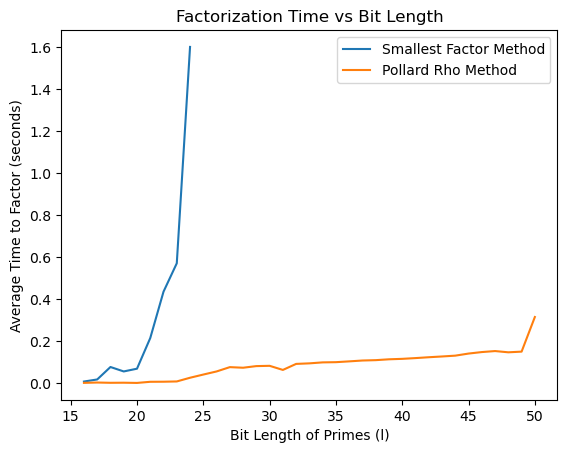

In [ ]:
# Write the function to plot graphs for both methods
def plot_graphs(data1, data2):
    x1 = np.array(data1[0])
    y1 = np.array(data1[1])

    x2 = np.array(data2[0])
    y2 = np.array(data2[1])

    plt.plot(x1, y1, label='Smallest Factor Method')
    plt.plot(x2, y2, label='Pollard Rho Method')

    plt.title('Factorization Time vs Bit Length')
    plt.xlabel('Bit Length of Primes (l)')
    plt.ylabel('Average Time to Factor (seconds)')
    plt.legend()
    plt.show()

# Plot graphs for the smallest factor and pollard rho version 1 data
plot_graphs(smallest_factor_data, pollard_rho_data_v1)

In [ ]:
def pollard_rho_v2(N, max_iterations=10000):

    c = random.randrange(1, N-1)  # Random constant for the polynomial
    def f(x):
        return (x * x + c) % N

    m0 = random.randrange(2, N-2)
    m1 = f(m0)
    m2 = f(f(m0))

    for i in range(1, max_iterations):  # Limit iterations to avoid infinite loops

        d = gcd(abs(m2 - m1), N)

        # print(m1, m2, d)  # Print the sequence values and gcd for tracing

        if d > 1 and d < N:
            return d  # Found a non-trivial factor

        m1 = f(m1)
        m2 = f(f(m2))
        
    return None  # No factor found within the iteration limit

Testing Pollard Rho v2 with N = 78667
Found factor:  97
Found factor is correct.

Testing Pollard Rho v2 with random N for 16 bit p and q:
p = 34429
q = 54773
N = 1885779617
Found factor: 54773
Found factor is correct.

Timing data for smallest factor function (bit lengths and average times):
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], [0.0015001296997070312, 0.0018019676208496094, 0.0014090538024902344, 0.003538846969604492, 0.002416849136352539, 0.003801107406616211, 0.007748126983642578, 0.0024809837341308594, 0.0027611255645751953, 0.004312038421630859, 0.006387233734130859, 0.026692867279052734, 0.07806277275085449, 0.022509098052978516, 0.08564305305480957, 0.09131026268005371, 0.09120774269104004, 0.095458984375, 0.09850382804870605, 0.10284686088562012, 0.10501503944396973, 0.10706591606140137, 0.10924696922302246, 0.119576215744

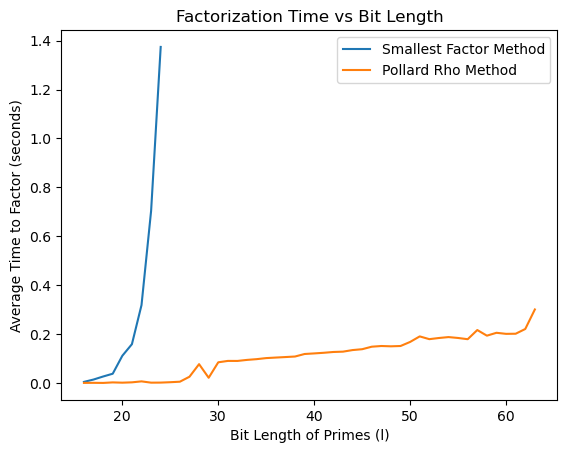

In [ ]:
# Test whether the function still works for inputs in the exampls
N = 78667
print("Testing Pollard Rho v2 with N =", N)
factor = pollard_rho_v2(N)
print("Found factor: ", factor)
if factor == 97:
    print("Found factor is correct.\n")

# Test whether the function works as intended for random p and q
print("Testing Pollard Rho v2 with random N for 16 bit p and q:")
test_factor_function(pollard_rho_v2)

# Generate data on pollard rho version 2 timings
l = 16
max_time = 0.3
iterations = 1
print("\nTiming data for smallest factor function (bit lengths and average times):")
pollard_rho_data_v2 = time_factorisation(l, max_time, iterations, pollard_rho_v2)
print(pollard_rho_data_v2)

# Plot graphs for the smallest factor and pollard rho version 2 data
plot_graphs(smallest_factor_data, pollard_rho_data_v2)

We will now plot calculate the same data but on the scale of minutes, as well as plot expected out- comes (extrapolated from your results) on longer bit lengths. We will hence conjecture at what bit length the use of each function becomes unfeasible.

To tackle this question:

1) I need to spend a while generating the data for multiple minutes and then saving this somewhere that I don't have to recreate it every time.

2) I will also need to work out how to extrapolate the data, maybe by finding curves that fit the data.

3) Lastly, I will need to research into what length of time and computational power needed to find p is considered unfeasable and thus secure enough for practical applications for encrypting sensitive data.

I would also like to add further explatation to the sections of this question already completed, such as why I have chosen too different methods for Pollard Rho, combining the charts into one, and sharing what I have learnt and understood about the algorithm.


#### Reflections on this question

Throughout this question we found that...

#### Reflections on the project

In conclusion, through this project we found that...